# Sentiment Analysis

Download data from: https://www.dropbox.com/s/ouhiwmzodc4baob/HW3-data-Sentiment.zip?dl=0 <br>
The folder contains - 
- Train.csv
- test.csv
- stopwords.txt

This part of the assignment has 4 parts -
1. Read the data
2. Create a word2vec model and use it in SVM classification
3. Use the sane data on RNN and LSTM models
4. Compare the results


### 1. Read the training data  [2.5 Points]

Read the data present in training.csv file. <br>
Perform the following cleaning on the data:
1. Keep only the Sentiment and sentiment text in the dataframe - the first and the last coumn
2. Some of the sentiments and sentiment texts are empty. Remove those rows.
3. Shuffle the rows of the data frame such that the positive and negative tweets are mixed
4. Print the first 5 sentiments.
5. Print the number of positive and negative sentiments


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('HW3-data/train.csv', encoding='ISO-8859-1')

df = df[df.columns[[0,5]]]
df.columns = ['Sentiment', 'Text']
df = df[df.Sentiment.isnull() == False]
df['Sentiment'] = df['Sentiment'].map(int)
df = df[df['Text'].isnull() == False]
df = df.sample(frac=1)
print(df.head(5))
df.groupby('Sentiment').count()


        Sentiment                                               Text
147707          0       @audiogirl79 oh no!!!!!  that totally sucks!
896020          1  tomorrow will be a very productive day! good n...
393424          0  just called Nintendo to get my wii repair all ...
195649          0  @subzero77 Hmm not sure yet, my mate cancelled...
197431          0  Was going to lay out in the sun..but it disapp...


,Text
Sentiment,
0,799999
1,800000


### 2\. Data Preparation  [5 points] 

Before building a neural network model, we first need to prepare the data. The input to a RNN model  is a matrix with shape (a, b), where a is the number of samples (twitters), and b is the sequence length of each tweet. Prepare the data with the following steps:
- Take the RAW texts of the top 5000 tweets in the dataframe, and convert them to a list of strings, where each string is a tweet.
- Use `Tokenizer` from `keras.preprocessing.text` to tokenize the texts and convert them to sequences (numbers) with `texts_to_sequences` method of `Tokenizer`. **When tokenizing, please only consider the top 10,000 words in the dataset (`num_words`=10,000)**. 
- Pad each sequence with zeros to **make the sequence length 120**.
- Split the above data (the sequence and the label) into training (67%) and validation (33%) sets.

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 120
max_words = 10000

texts = list(df['Text'].head(5000))
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


labels = df['Sentiment'].head(5000)

data = pad_sequences(sequences, maxlen=max_len)
X_train, X_validation, y_train, y_validation = train_test_split(data, labels, test_size=0.33, random_state=42)

Using TensorFlow backend.


### b) Simple RNN [10 points] 

i) [4 points] Build a simple RNN model with the following specification:
1. An embedding layer with output dimenstion 64.
2. A simple RNN layer.
3. A dense layer with sigmoid activation function for prediction.
Print the summary of the model.

In [10]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN, Dense

rnn_model = Sequential()
rnn_model.add(Embedding(max_words, 64, input_length=max_len))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________


ii) [6 points] Now train the simple RNN model:
- Compile the model with binary cross entory as loss and accuracy as evaluation metrics.
- Fit the model with the training set with 5 epochs and batch size 32.
- Plot the training and validation accuracy for each epoch.

In [11]:
rnn_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
rnn_history = rnn_model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_validation, y_validation))

Train on 3350 samples, validate on 1650 samples
Epoch 1/5
3350/3350 [==============================] - 8s - loss: 0.6912 - acc: 0.5215 - val_loss: 0.6915 - val_acc: 0.5109
Epoch 2/5
3350/3350 [==============================] - 7s - loss: 0.5529 - acc: 0.7499 - val_loss: 0.6502 - val_acc: 0.6418
Epoch 3/5
3350/3350 [==============================] - 8s - loss: 0.3453 - acc: 0.8710 - val_loss: 0.7060 - val_acc: 0.6339
Epoch 4/5
3350/3350 [==============================] - 8s - loss: 0.1591 - acc: 0.9513 - val_loss: 0.8208 - val_acc: 0.6152
Epoch 5/5
3350/3350 [==============================] - 8s - loss: 0.0729 - acc: 0.9812 - val_loss: 0.9723 - val_acc: 0.6188


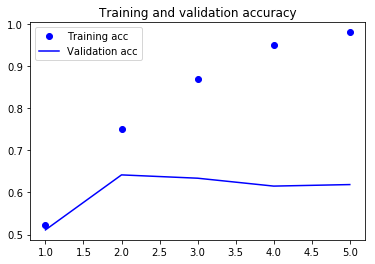

In [12]:
import matplotlib.pyplot as plt

def accuracy_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

accuracy_plot(rnn_history)

### c) LSTM [5 points] 

i) [1 point] Now built a LSTM model by replacing the simple RNN layter in the above model with a LSTM layer. Print a summary of the LSTM model.

In [13]:
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 64, input_length=max_len))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


ii) [1 point] Train the LSTM model with the same specifications in the simple RNN model. Again, plot the training and validation accuracy for each epoch.

In [14]:
lstm_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

lstm_history = lstm_model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_validation, y_validation))

Train on 3350 samples, validate on 1650 samples
Epoch 1/5
3350/3350 [==============================] - 38s - loss: 0.6563 - acc: 0.6233 - val_loss: 0.5982 - val_acc: 0.6715
Epoch 2/5
3350/3350 [==============================] - 37s - loss: 0.4883 - acc: 0.7791 - val_loss: 0.5461 - val_acc: 0.7333
Epoch 3/5
3350/3350 [==============================] - 35s - loss: 0.3940 - acc: 0.8427 - val_loss: 0.5730 - val_acc: 0.7279
Epoch 4/5
3350/3350 [==============================] - 37s - loss: 0.2925 - acc: 0.8851 - val_loss: 0.5918 - val_acc: 0.7291
Epoch 5/5
3350/3350 [==============================] - 40s - loss: 0.2363 - acc: 0.9104 - val_loss: 0.6346 - val_acc: 0.7352


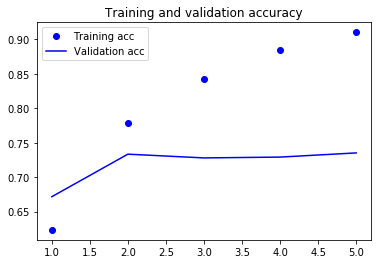

In [15]:
accuracy_plot(lstm_history)

iii) [3 points] In the previous models, we only use the top 5000 tweets. Now use the whole dataset, split it into training (67%) and validation (33%) set, and train the same LSTM model on the new traning data. plot the training and validation accuracy for each epoch.

In [ ]:
texts = list(df['Text'])
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

labels = df['Sentiment']

data = pad_sequences(sequences, maxlen=max_len)
X_train, X_validation, y_train, y_validation = train_test_split(data, labels, test_size=0.33, random_state=42)

In [ ]:
lstm_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

lstm_history = lstm_model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_validation, y_validation))

## 4. Results Comparision

1\. [2 points] Compare the simple RNN model and the LSTM model (trained on the 5000 tweets sample). Which one has a better performance? Why does this one outperform the other one?

A:  LSTM model has better performance, because the added gate architecture addresses the vanishing gradients problem and train the model more effectively.

2\. [2 points] Compare the simple RNN models with the SVM model. What are the common elements and what are the differences? Why do you think one outperforms the other? Which approach do you prefer?

A:
- Both RNN and SVM use word embeddings as features
- The word embedding trained in RNN is task specific while the one used in SVM is not.
- RNN takes the word sequences into account, while SVM only uses bag-of-words information.
- But sentiment analysis is a relatively simple task and sequential information might not be very useful.
- RNN automate several data pre-process and is easier to implement and fine tune.

3\. [2 points] Compare the LSTM model trained on a 5000 tweets sample and the one trained on the whole dataset. What are the cost and the benefit of each case?

A: Larger dataset generally produces better result (higher accuracy), but it is very time consuming to train on it.

### BONUS [5 points]
Run the method you prefer on the test.csv data provided to you. Perform the necessary steps to get the feature matrix and apply the desired model to produce semantic lables.